In [1]:
from hest import iter_hest, XeniumReader
import dask
dask.config.set({'dataframe.query-planning': False})
from pathlib import Path
import hest
print(hest.__version__)
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import valis_hest


# check gpu cucim
import cucim
print(cucim.__version__)
from cucim import CuImage

0.0.1


AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [2]:
%%bash
python - <<'PY'
import cv2
print("cv2 version:", cv2.__version__)
print("has xfeatures2d?", hasattr(cv2, "xfeatures2d"))
try:
    print("xfeatures2d members sample:", list(cv2.xfeatures2d.__dict__.keys())[:10])
except Exception as e:
    print("error inspecting xfeatures2d:", e)
PY

cv2 version: 4.7.0
has xfeatures2d? False
error inspecting xfeatures2d: module 'cv2' has no attribute 'xfeatures2d'


In [4]:
%%bash
python - <<'PY'
import cv2, sys, os
print("cv2 file:", cv2.__file__)
try:
    import pkgutil
    import importlib
    loader = importlib.machinery.SourceFileLoader("cv2", cv2.__file__)
    print("loaded from:", cv2.__file__)
except Exception as e:
    print("err:", e)
# show pip list filtered
import subprocess, json, sys
subprocess.run([sys.executable, "-m", "pip", "list"])
PY

Package                            Version             Editable project location
---------------------------------- ------------------- ----------------------------------------------------------
about-time                         4.2.1
absl-py                            1.4.0
adjustText                         0.8
aicspylibczi                       3.3.1
aiofiles                           22.1.0
aiohappyeyeballs                   2.6.1
aiohttp                            3.12.13
aiohttp-cors                       0.8.1
aiosignal                          1.3.1
aiosqlite                          0.19.0
airr                               1.5.0
alabaster                          0.7.13
albucore                           0.0.23
albumentations                     2.0.0
alembic                            1.10.4
alive-progress                     3.1.2
aniso8601                          9.0.1
anndata                            0.9.1
anndata2ri                         1.3.1
annotated-types      

dunamai                            1.16.0
eido                               0.2.2
einops                             0.8.1
einops-exts                        0.0.4
entrypoints                        0.4
equinox                            0.11.12
et-xmlfile                         1.1.0
ete3                               3.1.3
etils                              1.12.2
etuples                            0.3.8
ewah_bool_utils                    1.3.0
executing                          1.2.0
face                               20.1.1
faiss-cpu                          1.9.0.post1
fastapi                            0.103.2
fastcluster                        1.2.6
fasteners                          0.18
fastjsonschema                     2.16.3
fastobo                            0.12.2
fastools                           1.1.5
fastprogress                       1.0.3
fastremap                          1.13.4
fastrlock                          0.8.3
fbpca                              1.0
feath

logomaker                          0.8
loguru                             0.7.3
loompy                             3.0.7
looper                             1.5.1
lxml                               4.9.2
lz4                                4.3.2
lzstring                           1.0.4
MACS2                              2.2.9.1
MACS3                              3.0.2
mageck                             0.5.9.5
mageck-nest                        0.0.0
Mako                               1.2.4
mappy                              2.26
Markdown                           3.4.3
markdown-it-py                     2.2.0
MarkupSafe                         2.1.2
marshmallow                        3.19.0
matplotlib                         3.7.1
matplotlib-inline                  0.1.6
matplotlib-scalebar                0.8.1
maxfuse                            0.0.2
mccabe                             0.7.0
mdit-py-plugins                    0.3.5
mdurl                              0.1.2
mgatk         

prometheus-client                  0.16.0
prompt-toolkit                     3.0.38
propcache                          0.3.2
proto-plus                         1.26.1
protobuf                           3.20.3
psutil                             5.9.5
psycopg2-binary                    2.9.9
ptyprocess                         0.7.0
PubChemPy                          1.0.4
PuLP                               2.7.0
pure-eval                          0.2.2
pwseqdist                          0.6
py                                 1.11.0
py-cpuinfo                         9.0.0
py-spy                             0.4.0
py2bit                             0.3.0
py4j                               0.10.9.7
pyabc                              0.12.16
pyarrow                            16.1.0
pyasn1                             0.5.0
pyasn1-modules                     0.3.0
pybedtools                         0.9.1
pyBigWig                           0.3.22
pybktree                           1.1
pycairo 

setuptools-scm                     7.1.0
shap                               0.46.0
shapely                            2.0.4
shortuuid                          1.0.11
simplegeneric                      0.8.1
simpleitk                          2.5.2
simplejson                         3.19.1
simsimd                            6.2.1
sinfo                              0.3.4
singledispatch                     4.0.0
sinto                              0.9.0
six                                1.16.0
sklearn                            0.0.post5
slicer                             0.0.8
slicerator                         1.1.0
smart-open                         6.3.0
smfishHmrf                         1.3.3
smmap                              5.0.0
smmap2                             3.0.1
snakemake                          7.25.3
sniffio                            1.3.0
snowballstemmer                    2.2.0
sorted-nearest                     0.0.38
sortedcontainers                   2.4.0
soupsi

zstandard                          0.22.0
cv2 file: /package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/cv2/__init__.py
loaded from: /package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/cv2/__init__.py


XeniumReader.read(img_path: str, experiment_path: str, alignment_file_path: str | None = None, feature_matrix_path: str | None = None, transcripts_path: str | None = None, cells_path: str | None = None, nucleus_bound_path: str | None = None, cell_bound_path: str | None = None, dapi_path=None, load_img=True, use_dask=False)→ XeniumHESTData
Read a Xenium sample

Parameters
:
img_path (str) – path to the WSI

experiment_path (str) – path to a experiment.xenium file

alignment_file_path (str, optional) – path to a DAPI->H&E alignment file, None if the H&E is already aligned with the DAPI. Defaults to None.

feature_matrix_path (str, optional) – path to a cell_feature_matrix.h5. Defaults to None.

transcripts_path (str, optional) – path to a transcripts.parquet, None to not load the transcripts. Defaults to None.

cells_path (str, optional) – path to a cells.parquet file, None to not load the cells. Defaults to None.

nucleus_bound_path (str, optional) – path to a nucleus_boundaries.parquet file. Defaults to None.

cell_bound_path (str, optional) – path to a cell_boundaries file. Defaults to None.

dapi_path (_type_, optional) – path to a morphology_focus_0000.ome.tif/morphology_focus.ome.tif file. Defaults to None.

load_img (bool, optional) – whenever to load the WSI. Defaults to True.

use_dask (bool, optional) – whenever to load the transcript dataframe with DASK (recommended if the transcript dataframe does not fit into the RAM). Defaults to False.

Returns
:
Xenium sample

Return type
:
XeniumHESTData

To speed up Xenium reader, use module load py-nvidia-rapids  # contains cucim

It requires gpu-ada

In [ ]:
#sys.path.insert(0,'/home/k/kxu/.local/lib/python3.12/site-packages')
#import sys ; sys.path.insert(0,'/home/k/kxu/.local/lib/python3.11/site-packages')

In [ ]:
# check gpu
# import subprocess

# try:
#     result = subprocess.run(["nvidia-smi"], capture_output=True, text=True, check=True)
#     print(result.stdout)
# except FileNotFoundError:
#     print("nvidia-smi not found (no NVIDIA driver or GPU not available).")
# except subprocess.CalledProcessError as e:
#     print("Error running nvidia-smi:", e.stderr)

# Slide 1 - 43739

## CAM006

In [2]:
# Base stem for experiment outputs (10 min)
exp_stem = Path("/project/simmons_hts/shared/20_11_2024_xenium_prime_run1/"
                "20241113__143534__SIMMONS_super_secret_prime_run1/"
                "output-XETG00283__0043739__Region_1__20241113__143611")

st = XeniumReader().read(
    img_path="/project/simmons_hts/jpark/1_project/0_xenium/"
             "RUNTRexBio/post_HnE/CAM006_Xenium5K_post_HnE.ome.tif",
    experiment_path=exp_stem / "experiment.xenium",
    #alignment_file_path= '/project/simmons_hts/jpark/1_project/0_xenium/RUNTRexBio/post_HnE/CAM006_Xenium5K_post_HnE_matrix.csv',
    feature_matrix_path=exp_stem / "cell_feature_matrix.h5",
    transcripts_path=exp_stem / "transcripts.parquet",
    cells_path=exp_stem / 'cells.parquet',
    nucleus_bound_path=exp_stem / 'nucleus_boundaries.parquet',
    cell_bound_path=exp_stem / 'cell_boundaries.parquet',
    dapi_path=exp_stem / 'morphology_focus/morphology_focus_0000.ome.tif',
    use_dask=True
)

Loading the WSI... (can be slow for large images)
alignment file missing. Using identity matrix as alignment matrix. Remember to align image later
Loading transcripts...
Pooling xenium transcripts in pseudo-visium spots...
Reading cells...


/home/k/kxu/.local/lib/python3.11/site-packages/hestcore/wsi.py:27: UserWarning: CuImage is not available. Ensure you have a GPU and cucim installed to use GPU acceleration.
  warnings.warn("CuImage is not available. Ensure you have a GPU and cucim installed to use GPU acceleration.")


In [4]:
# Path to the H&E image we just saved
he_path = '/project/simmons_hts/kxu/hest/xenium_data/XeniumPR1_segger/slide1/ROI1/aligned_fullres_HE.tif'
dapi_path = exp_stem / 'morphology_focus/morphology_focus_0000.ome.tif'

# Warning Valis alignment might require a significant amount or RAM based on the number of transcripts, shapes and image size
# Feel free to set align_transcripts, align_cells or align_nuclei to False
st.align_with_valis('.', he_path, dapi_path, align_transcripts=False, align_cells=False, align_nuclei=False)

NameError: name 'exp_stem' is not defined

In [5]:
st

NameError: name 'st' is not defined

cv2 version: 4.7.0
has xfeatures2d? False
error inspecting xfeatures2d: module 'cv2' has no attribute 'xfeatures2d'


In [6]:
# ST (adata):
adata = st.adata
print('\n* Scanpy adata:')
print(adata)
adata_hest = adata # backup

# WSI:
wsi = st.wsi
print('\n* WSI:')
print(wsi)

# Shapes:
shapes = st.shapes
print('\n* Shapes:')
print(shapes)

# Cell (adata):
cell_adata = st.cell_adata
print('\n* Scanpy cell_adata:')
print(cell_adata)

# metadata:
metadata = st.meta
print('\n* Metadata:')
print(metadata)

# Tissue segmentation (does not have it)
#tissue_contours = st.tissue_contours
#print('\n* Tissue contours:')
#print(tissue_contours)

# Conversion to SpatialData
#sdata = st.to_spatial_data()
#print('\n* SpatialData conversion:')
#print(sdata)


* Scanpy adata:
AnnData object with n_obs × n_vars = 22171 × 9655
    obs: 'in_tissue', 'pxl_col_in_fullres', 'pxl_row_in_fullres', 'array_col', 'array_row', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

* WSI:
<width=8851, height=8585, backend=NumpyWSI>

* Shapes:
[name: tenx_cell, coord-system: dapi, <not loaded>, name: tenx_cell, coord-system: he, <not loaded>, name: tenx_nucleus, coord-system: dapi, <not loaded>, name: tenx_nucleus, coord-system: he, <not loaded>]

* Scanpy cell_adata:
AnnData object with n_obs × n_vars = 1074150 × 5100
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_

In [8]:
# Check the keys in adata.uns["spatial"]
print("Keys in adata.uns['spatial']:", st.adata.uns['spatial'].keys())

# Inspect the ST slot
spatial_ST = st.adata.uns['spatial']['ST']
print("Keys in adata.uns['spatial']['ST']:", spatial_ST.keys())

# Images available
images = spatial_ST.get('images', {})
print("Images available:", list(images.keys()))
for k, v in images.items():
    print(f"  {k}: type={type(v)}, shape={getattr(v, 'shape', 'N/A')}")

# Scale factors
scalefactors = spatial_ST.get('scalefactors', {})
print("Scale factors available:", scalefactors)
for k, v in scalefactors.items():
    print(f"  {k}: {v}")

Keys in adata.uns['spatial']: dict_keys(['ST'])
Keys in adata.uns['spatial']['ST']: dict_keys(['images', 'scalefactors'])
Images available: ['downscaled_fullres']
  downscaled_fullres: type=<class 'numpy.ndarray'>, shape=(970, 1000, 3)
Scale factors available: {'spot_diameter_fullres': 126.3347007309907, 'tissue_downscaled_fullres_scalef': 0.1129815840018077}
  spot_diameter_fullres: 126.3347007309907
  tissue_downscaled_fullres_scalef: 0.1129815840018077


In [8]:
downscaled_img = st.adata.uns['spatial']['ST']['images']['downscaled_fullres']

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(downscaled_img)
plt.axis('off')
plt.title("Downscaled Image")
plt.show()

In [9]:
def fast_spatial(adata, x, y, spot_size=2, max_cells=10000, color=None, cmap='viridis'):
    """
    Fast spatial plotting using centroid coordinates from Seurat-converted AnnData.
    
    adata: AnnData object
    x, y: obs column names for coordinates
    spot_size: size of points
    max_cells: max number of cells to plot (random subsample for speed)
    color: optional, name of obs column or var (gene) to color by
    cmap: colormap for continuous values
    """
    # Subsample if needed
    if adata.n_obs > max_cells:
        idx = np.random.choice(adata.n_obs, max_cells, replace=False)
        adata_plot = adata[idx, :]
    else:
        adata_plot = adata

    x_vals = adata_plot.obs[x]
    y_vals = adata_plot.obs[y]

    # Handle color
    if color is None:
        c = "grey"
    elif color in adata_plot.obs.columns:
        c = adata_plot.obs[color]
    elif color in adata_plot.var_names:  # gene name
        c = adata_plot[:, color].X.toarray().flatten()
    else:
        raise ValueError(f"{color} not found in .obs or .var")

    plt.figure(figsize=(6, 6))
    sc = plt.scatter(x_vals, y_vals, s=spot_size, c=c, cmap=cmap, alpha=0.7)
    plt.gca().invert_yaxis()  # match spatial orientation
    plt.title(f"Spatial plot ({color if color else 'no color'})")

    if color is not None:
        plt.colorbar(sc, label=color)

    plt.show()

### Filter AnnData to only include the bits under image

In [10]:
# HEST object from your snippet
# st = XeniumReader().read(...)

adata = st.adata

# 1) Get pixel coords on the H&E (prefer obsm['spatial'] if present)
if 'spatial' in adata.obsm_keys():
    xy = adata.obsm['spatial']
    x = np.asarray(xy[:, 0])    # column (x)
    y = np.asarray(xy[:, 1])    # row (y)
else:
    # fallback to Scanpy-style columns
    x = adata.obs['pxl_col_in_fullres'].to_numpy()
    y = adata.obs['pxl_row_in_fullres'].to_numpy()

# 2) Get the size of THIS piece’s H&E WSI (the one you passed in img_path)
W = st.wsi.width
H = st.wsi.height

# 3) Keep only points that lie inside this WSI
mask = (x >= 0) & (y >= 0) & (x < W) & (y < H)
adata_piece = adata[mask].copy()

print(adata.shape, '->', adata_piece.shape)

(22171, 9655) -> (1260, 9655)


/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [11]:
# # visualize the spots over a downscaled version of the full resolution image
# save_dir = Path("/project/simmons_hts/kxu/hest/xenium_data/xenium_prime_run1/slide43739/ROI1")
# # create directory (recursively) if it doesn't exist
# save_dir.mkdir(parents=True, exist_ok=True)
# st.save_spatial_plot(save_dir)

/tmp/ipykernel_4144992/3061044964.py:2: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color="n_counts", img_key="downscaled_fullres")


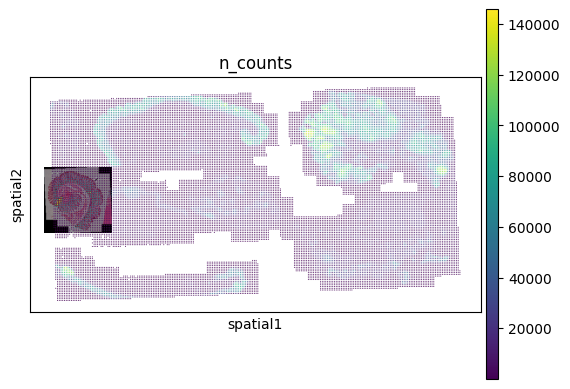

/tmp/ipykernel_4144992/3061044964.py:3: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_piece, color="n_counts", img_key="downscaled_fullres")


In [ ]:
# → dict_keys(['hires', 'lowres'])
sc.pl.spatial(adata, color="n_counts", img_key="downscaled_fullres")
sc.pl.spatial(adata_piece, color="n_counts", img_key="downscaled_fullres") #long wait

### Filter out unuseful variable names

In [12]:
# # Keep only variables (genes) that do not contain "Codeword"
# # Rank genes by the length of their names (string length)
# top10 = sorted(adata_piece.var_names, key=len, reverse=True)[:200]
# print(top10)
mask = ~adata_piece.var_names.str.contains("Codeword")
adata_piece = adata_piece[:, mask].copy()

print(adata_piece)

st.adata = adata_piece

AnnData object with n_obs × n_vars = 1260 × 5161
    obs: 'in_tissue', 'pxl_col_in_fullres', 'pxl_row_in_fullres', 'array_col', 'array_row', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'


### filter out cells not under HE (cell coordinate is not in HE coordinate - NOT WORK)

In [89]:
# cell_adata = st.cell_adata  # whole-slide AnnData
# cell_adata

# # 1) Get H&E pixel coords (prefer obsm['spatial']; fall back to obs['he_x','he_y'])
# x = cell_adata.obs['x_centroid'].to_numpy()
# y = cell_adata.obs['y_centroid'].to_numpy()

# # 2) Current TIF width/height (the piece you loaded via img_path)
# W = st.wsi.width
# H = st.wsi.height

# # 3) Keep only points inside the WSI rectangle (and drop NaNs)
# mask = (x >= 0) & (y >= 0) & (x < W) & (y < H) & np.isfinite(x) & np.isfinite(y)
# adata_piece = cell_adata[mask].copy()

# print("Filtered:", cell_adata.shape, "→", adata_piece.shape)

# # st.cell_adata = adata_piece

Filtered: (1074150, 5100) → (231916, 5100)


## cell_data do not seem aligned (its coordinate is different from transcript df)

In [13]:
# 1) Sanity-check the ranges
def r(a): 
    return float(np.nanmin(a)), float(np.nanmax(a))

print("spots x/y HE px:", r(st.adata.obsm["spatial"][:,0]), r(st.adata.obsm["spatial"][:,1]))
print("cells he_x/he_y:", r(st.cell_adata.obs["he_x"].values), r(st.cell_adata.obs["he_y"].values))
print("cells x/y centroid (Xenium space):", r(st.cell_adata.obs["x_centroid"].values), r(st.cell_adata.obs["y_centroid"].values))

spots x/y HE px: (1115.5811327974452, 8695.663176656888) (7.313984374437666, 8506.193851731994)
cells he_x/he_y: (102.27174646714154, 54176.84742647059) (23.385321673224954, 108863.70404411765)
cells x/y centroid (Xenium space): (21.732746124267578, 11512.580078125) (4.969380855560303, 23133.537109375)


/tmp/ipykernel_1277757/3614588020.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = plt.scatter(x_vals, y_vals, s=spot_size, c=c, cmap=cmap, alpha=0.7)


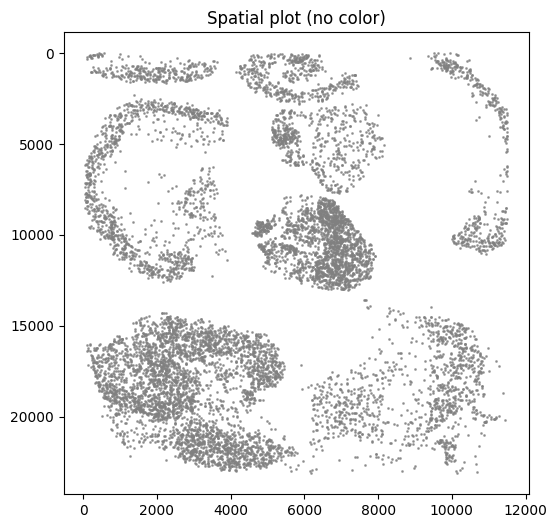

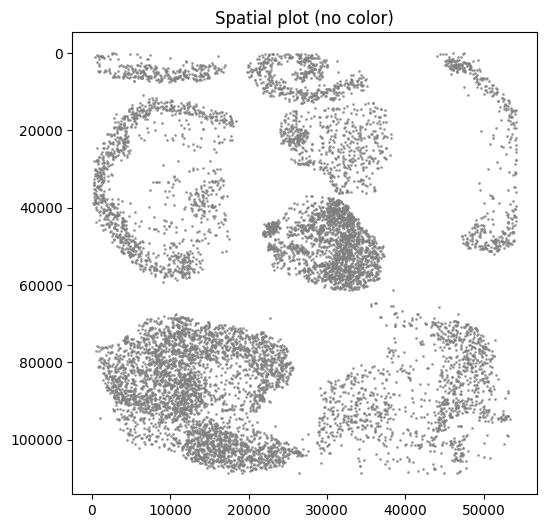

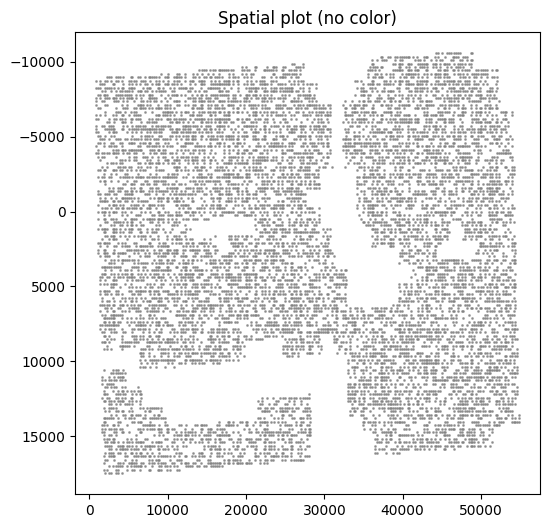

In [14]:
cell_adata = st.cell_adata
fast_spatial(cell_adata, x = 'x_centroid', y = 'y_centroid', spot_size=1)

fast_spatial(cell_adata, x = 'he_x', y = 'he_y', spot_size=1)
fast_spatial(adata, x = 'pxl_col_in_fullres', y = 'pxl_row_in_fullres', spot_size=1)
#fast_spatial(adata, x = 'array_col', y = 'array_row', spot_size=1) # super downsampled


AnnData object with n_obs × n_vars = 1260 × 5161
    obs: 'in_tissue', 'pxl_col_in_fullres', 'pxl_row_in_fullres', 'array_col', 'array_row', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'


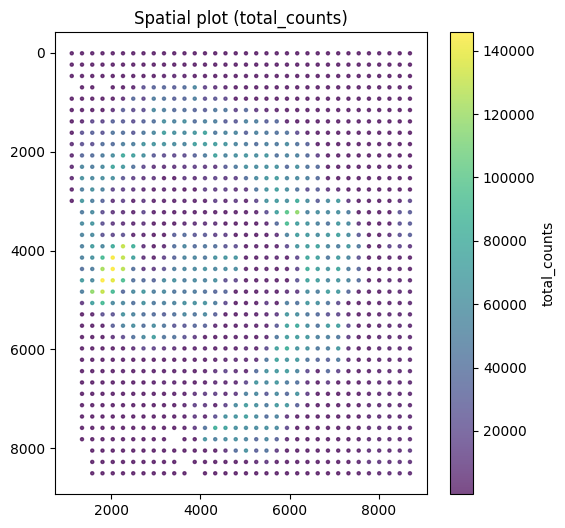

In [15]:
print(st.adata)
fast_spatial(st.adata, x = 'pxl_col_in_fullres', y = 'pxl_row_in_fullres', color = 'total_counts', spot_size=5)

# realign cell data

In [16]:
# 1) Load the 3×3 affine and pixel size (µm/px of the DAPI/morph image)
from hest.utils import read_xenium_alignment, align_xenium_df

A = read_xenium_alignment('/project/simmons_hts/jpark/1_project/0_xenium/RUNTRexBio/post_HnE/CAM006_Xenium5K_post_HnE_matrix.csv')  # 3×3
px_um = st.meta["pixel_size"]  # if you stored it; otherwise pass the value you used

# 2) Apply the transform to cells (inputs must be DAPI-frame coordinates in µm)
df = st.cell_adata.obs[["x_centroid", "y_centroid"]].copy()
df = align_xenium_df(
    df,
    alignment_matrix=A,
    pixel_size_morph=px_um,
    x_key="x_centroid",
    y_key="y_centroid",
    to_dapi=False,          # DAPI(µm) -> H&E
    x_key_dist="he_x",
    y_key_dist="he_y",
)

# 3) Commit back to AnnData in H&E **pixels**
cell_adata.obs[["he_x", "he_y"]] = df[["he_x", "he_y"]]
cell_adata.obsm["spatial"] = df[["he_x", "he_y"]].to_numpy()

# 4) (Optional) clip to slide bounds to drop off-image points
def coord_range(arr):
    return float(np.nanmin(arr[:,0])), float(np.nanmax(arr[:,0])), \
           float(np.nanmin(arr[:,1])), float(np.nanmax(arr[:,1]))

# Before filtering
x_min, x_max, y_min, y_max = coord_range(cell_adata.obsm["spatial"])
print(f"Before filtering → x:[{x_min:.1f}, {x_max:.1f}], y:[{y_min:.1f}, {y_max:.1f}]")

# Apply filtering
W, H = st.wsi.width, st.wsi.height
cx, cy = cell_adata.obsm["spatial"][:,0], cell_adata.obsm["spatial"][:,1]
keep = (cx >= 0) & (cx < W) & (cy >= 0) & (cy < H)
cell_adata_filt = cell_adata[keep].copy()

# After filtering
x_min, x_max, y_min, y_max = coord_range(cell_adata_filt.obsm["spatial"])
print(f"After filtering  → x:[{x_min:.1f}, {x_max:.1f}], y:[{y_min:.1f}, {y_max:.1f}]")

Before filtering → x:[792.2, 54764.2], y:[-10584.5, 17434.2]
After filtering  → x:[1188.0, 8851.0], y:[3.8, 8585.0]


/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/_core/anndata.py:1105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [18]:
# Single cell data to be aligned
fname = '/project/simmons_hts/kxu/hest/xenium_labelled/XeniumPR1S1ROI1.h5ad'
print('\n* Scanpy adata:')
adata_labelled = sc.read_h5ad(fname)
print(adata_labelled)
print(adata_labelled.obs.head())     # Metadata for cells
print(adata_labelled.var.head())     # Metadata for genes


* Scanpy adata:
AnnData object with n_obs × n_vars = 26577 × 5121
    obs: 'nCount_RNA', 'nFeature_RNA', 'index_safe', 'transcripts', 'unique_transcripts', 'cell_centroid_x', 'cell_centroid_y', 'cell_area', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.7', 'seurat_clusters', 'pANN_0.25_0.005_210', 'predicted.id.score', 'predicted.id'
    var: 'gene', 'total_assigned', 'total_unassigned'
    obsm: 'X_pca', 'X_umap'
            nCount_RNA  nFeature_RNA  index_safe  transcripts  \
aaknmimg-1        32.0            27  aaknmimg-1           32   
ajcikkkl-1       165.0           137  ajcikkkl-1          165   
aaiognhg-1        42.0            40  aaiognhg-1           42   
idihpaid-1        73.0            64  idihpaid-1           73   
icfpikjg-1       180.0           156  icfpikjg-1          180   

            unique_transcripts  cell_centroid_x  cell_centroid_y  cell_area  \
aaknmimg-1                  27      4836.930664      1349.580566  16.553150   
ajcikkkl-1                 137   

In [19]:
# 1) Load the 3×3 affine and pixel size (µm/px of the DAPI/morph image)
from hest.utils import read_xenium_alignment, align_xenium_df

A = read_xenium_alignment('/project/simmons_hts/jpark/1_project/0_xenium/RUNTRexBio/post_HnE/CAM006_Xenium5K_post_HnE_matrix.csv')  # 3×3
px_um = st.meta["pixel_size"]  # if you stored it; otherwise pass the value you used

# 2) Apply the transform to cells (inputs must be DAPI-frame coordinates in µm)
df = adata_labelled.obs[["cell_centroid_x", "cell_centroid_y"]].copy()
df = align_xenium_df(
    df,
    alignment_matrix=A,
    pixel_size_morph=px_um,
    x_key="cell_centroid_x",
    y_key="cell_centroid_y",
    to_dapi=False,          # DAPI(µm) -> H&E
    x_key_dist="he_x",
    y_key_dist="he_y",
)

# 3) Commit back to AnnData in H&E **pixels**
adata_labelled.obs[["he_x", "he_y"]] = df[["he_x", "he_y"]]
adata_labelled.obsm["spatial"] = df[["he_x", "he_y"]].to_numpy()

x_min, x_max, y_min, y_max = coord_range(adata_labelled.obsm["spatial"])
print(f"x:[{x_min:.1f}, {x_max:.1f}], y:[{y_min:.1f}, {y_max:.1f}]")
adata_labelled


x:[1187.2, 7341.8], y:[539.2, 8221.5]


AnnData object with n_obs × n_vars = 26577 × 5121
    obs: 'nCount_RNA', 'nFeature_RNA', 'index_safe', 'transcripts', 'unique_transcripts', 'cell_centroid_x', 'cell_centroid_y', 'cell_area', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.7', 'seurat_clusters', 'pANN_0.25_0.005_210', 'predicted.id.score', 'predicted.id', 'he_x', 'he_y'
    var: 'gene', 'total_assigned', 'total_unassigned'
    obsm: 'X_pca', 'X_umap', 'spatial'

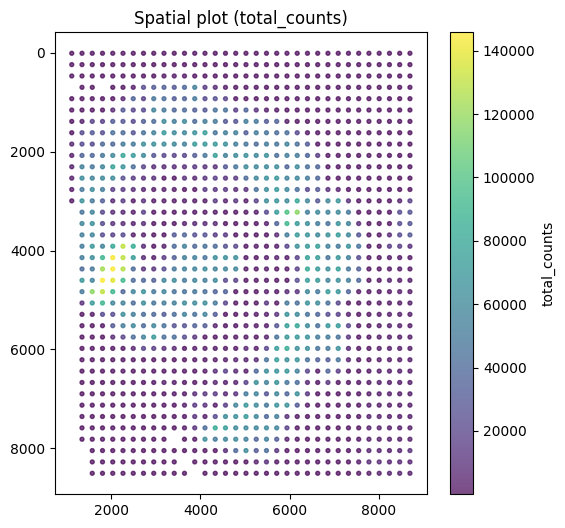

/tmp/ipykernel_1277757/3614588020.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = plt.scatter(x_vals, y_vals, s=spot_size, c=c, cmap=cmap, alpha=0.7)


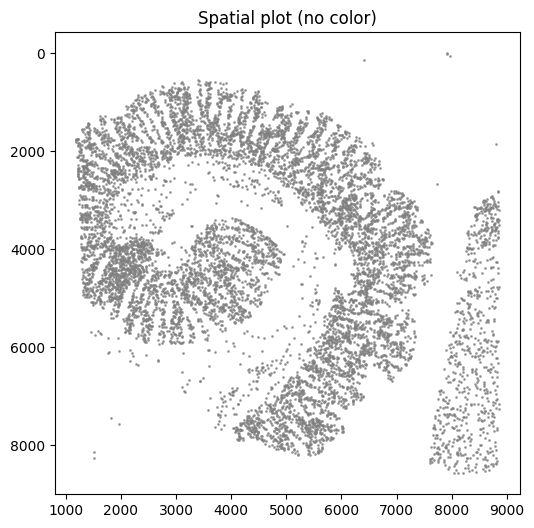

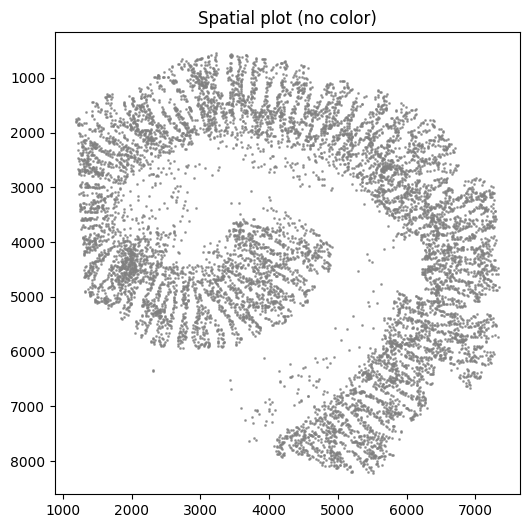

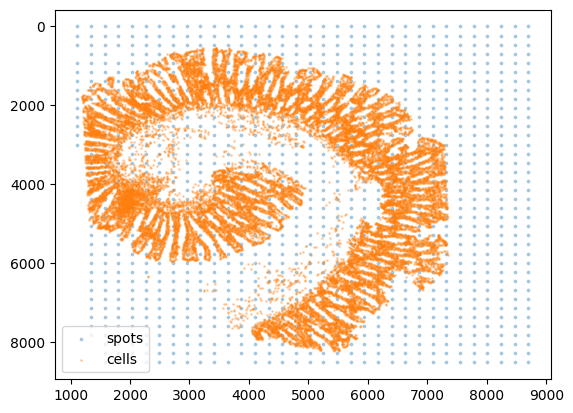

In [26]:
# check all plots are in the ame coordinates 
#fast_spatial(cell_adata, x = 'x_centroid', y = 'y_centroid', spot_size=1)

# st.adata (filtered to HE area)
fast_spatial(st.adata, x = 'pxl_col_in_fullres', y = 'pxl_row_in_fullres', color = 'total_counts', spot_size=8)

# realigned cell adata, filtered to HE area
fast_spatial(cell_adata_filt, x = 'he_x', y = 'he_y', spot_size=1)

# aligned cell adata with labelled cell type, filtered to HE area 
fast_spatial(adata_labelled, x = 'he_x', y = 'he_y', spot_size=1)

# overlap spot and cell data 
plt.scatter(st.adata.obsm["spatial"][:,0], st.adata.obsm["spatial"][:,1],
            s=3, alpha=0.3, label="spots")
plt.scatter(adata_labelled.obsm["spatial"][:,0], adata_labelled.obsm["spatial"][:,1],
            s=1, alpha=0.3, label="cells")
plt.gca().invert_yaxis(); plt.legend(); plt.show()

In [33]:
# --- rename columns if they exist ---
rename_map = {
    "cell_centroid_x": "x_centroid",
    "cell_centroid_y": "y_centroid",
    "index_safe":      "cell_id",        # if you want a shared ID column
    "predicted.id":    "cell_type",      # optional: clearer name
    'transcripts':     'transcript_counts',
    'predicted.id.score':'cell_type_prob'
}
existing = {k: v for k, v in rename_map.items() if k in adata_labelled.obs.columns}
if existing:
    adata_labelled.obs.rename(columns=existing, inplace=True)
    
adata_labelled.obs["segmentation_method"] = "segger"
    
adata_labelled

AnnData object with n_obs × n_vars = 26577 × 5121
    obs: 'nCount_RNA', 'nFeature_RNA', 'cell_id', 'transcript_counts', 'unique_transcripts', 'x_centroid', 'y_centroid', 'cell_area', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.7', 'seurat_clusters', 'pANN_0.25_0.005_210', 'cell_type_prob', 'cell_type', 'he_x', 'he_y', 'segmentation_method'
    var: 'gene', 'total_assigned', 'total_unassigned'
    obsm: 'X_pca', 'X_umap', 'spatial'

In [30]:
print(adata_labelled.obs.head()) 

            nCount_RNA  nFeature_RNA     cell_id  transcripts  \
aaknmimg-1        32.0            27  aaknmimg-1           32   
ajcikkkl-1       165.0           137  ajcikkkl-1          165   
aaiognhg-1        42.0            40  aaiognhg-1           42   
idihpaid-1        73.0            64  idihpaid-1           73   
icfpikjg-1       180.0           156  icfpikjg-1          180   

            unique_transcripts   x_centroid   y_centroid  cell_area  \
aaknmimg-1                  27  4836.930664  1349.580566  16.553150   
ajcikkkl-1                 137  5826.780273   412.257751  17.851304   
aaiognhg-1                  40  5202.537598  1858.666626  14.874126   
idihpaid-1                  64  5618.327148   188.296234  15.682601   
icfpikjg-1                 156  7288.451172  1601.582153  18.148302   

            nCount_SCT  nFeature_SCT SCT_snn_res.0.7 seurat_clusters  \
aaknmimg-1        46.0            27               7               7   
ajcikkkl-1       135.0           125  

In [29]:
cell_adata_filt
print(cell_adata_filt.obs.head()) 

               cell_id   x_centroid   y_centroid  transcript_counts  \
aaabdfnn-1  aaabdfnn-1  4354.835449   908.806213                390   
aaabfmag-1  aaabfmag-1  4361.742676   918.480408                357   
aaabgkhe-1  aaabgkhe-1  4366.665039   913.739624                369   
aaabgnaa-1  aaabgnaa-1  4356.661133  1014.227661                878   
aaabhmoa-1  aaabhmoa-1  4402.548340  1079.005493                602   

            control_probe_counts  genomic_control_counts  \
aaabdfnn-1                     0                       0   
aaabfmag-1                     0                       0   
aaabgkhe-1                     0                       0   
aaabgnaa-1                     0                       0   
aaabhmoa-1                     0                       0   

            control_codeword_counts  unassigned_codeword_counts  \
aaabdfnn-1                        0                           0   
aaabfmag-1                        0                           0   
aaabgkhe-1 

### filter out spots from other samples on the edge

In [40]:
# --- get the cell bbox in H&E px, add a safety margin ---
cx, cy = adata_labelled.obs["he_x"].to_numpy(), adata_labelled.obs["he_y"].to_numpy()
marg = 400  # pixels, tweak if needed
xmin, xmax = float(np.nanmin(cx)) - marg, float(np.nanmax(cx)) + marg
ymin, ymax = float(np.nanmin(cy)) - marg, float(np.nanmax(cy)) + marg

# --- st.adata spots live in .obs['pxl_col_in_fullres'], .obs['pxl_row_in_fullres'] ---
sx = st.adata.obs["pxl_col_in_fullres"].to_numpy()
sy = st.adata.obs["pxl_row_in_fullres"].to_numpy()

keep_spots = (sx >= xmin) & (sx <= xmax) & (sy >= ymin) & (sy <= ymax)

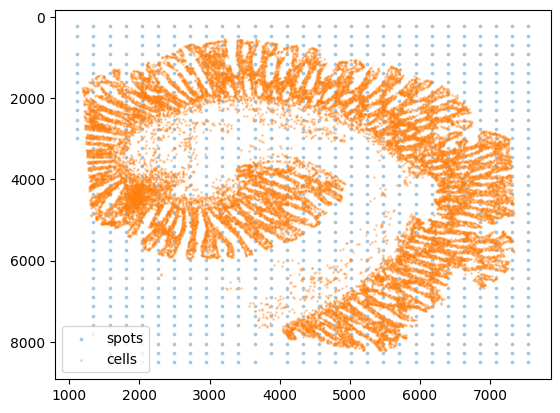

In [41]:
# overlap spot and cell data 
plt.scatter(st.adata[keep_spots].obsm["spatial"][:,0], st.adata[keep_spots].obsm["spatial"][:,1],
            s=3, alpha=0.3, label="spots")
plt.scatter(adata_labelled.obsm["spatial"][:,0], adata_labelled.obsm["spatial"][:,1],
            s=1, alpha=0.3, label="cells")
plt.gca().invert_yaxis(); plt.legend(); plt.show()

In [48]:
st.cell_adata = adata_labelled.copy()
st.adata = st.adata[keep_spots].copy()

In [58]:
cell_adata

AnnData object with n_obs × n_vars = 1074150 × 5100
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'he_x', 'he_y'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

## edit metadata

In [63]:
# update counts
meta = st.meta

# Keep a copy of old values for comparison
old_vals = {
    "num_cells": meta.get("num_cells"),
    "cells_under_tissue": meta.get("cells_under_tissue"),
    "transcripts_per_cell": meta.get("transcripts_per_cell"),
    "total_cell_area": meta.get("total_cell_area"),
}

# Update with new st.cell_adata
new_vals = {}
new_vals["num_cells"] = st.cell_adata.n_obs
new_vals["cells_under_tissue"] = st.cell_adata.n_obs
new_vals["transcripts_per_cell"] = float(st.cell_adata.obs["transcript_counts"].mean())
new_vals["total_cell_area"] = float(st.cell_adata.obs["cell_area"].sum())

# Print before/after
print("---- Metadata update ----")
for k in old_vals:
    print(f"{k}: {old_vals[k]}  -->  {new_vals.get(k)}")

# Commit back to st.meta
meta.update(new_vals)
st.meta = meta

---- Metadata update ----
num_cells: 26577  -->  26577
cells_under_tissue: 26577  -->  26577
transcripts_per_cell: 115.7133988034767  -->  115.7133988034767
total_cell_area: 442995.8399666354  -->  442995.8399666354


/home/k/kxu/.local/lib/python3.11/site-packages/hest/HESTData.py:1390: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  fig = sc.pl.spatial(adata, show=False, img_key="downscaled_fullres", color=[key], title=f"in_tissue spots", return_fig=True, **pl_kwargs)


saving to pyramidal tiff... can be slow


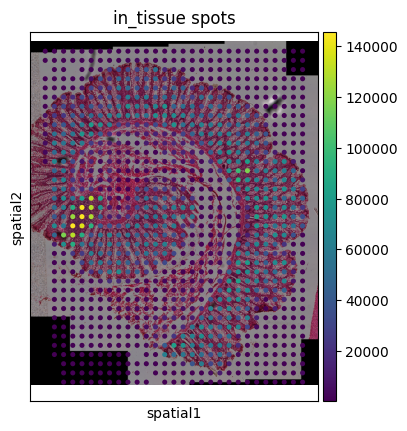

In [64]:
save_dir = Path("/project/simmons_hts/kxu/hest/xenium_data/XeniumPR1_segger/slide1/ROI1")
# # create directory (recursively) if it doesn't exist
save_dir.mkdir(parents=True, exist_ok=True)
st.save_spatial_plot(save_dir)
# Warning saving a large image to pyramidal tiff (>1GB) can be slow on a hard drive.
st.save(save_dir, pyramidal=True)

## TIP877

In [ ]:
# Base stem for experiment outputs
exp_stem = Path("/project/simmons_hts/shared/20_11_2024_xenium_prime_run1/"
                "20241113__143534__SIMMONS_super_secret_prime_run1/"
                "output-XETG00283__0043739__Region_1__20241113__143611") 

TIP877 = XeniumReader().read(
    img_path="/project/simmons_hts/jpark/1_project/0_xenium/"
             "RUNTRexBio/post_HnE/TIP877_Xenium5K_post_HnE.ome.tif",
    experiment_path=exp_stem / "experiment.xenium",
    alignment_file_path= '/project/simmons_hts/jpark/1_project/0_xenium/RUNTRexBio/post_HnE/TIP877_Xenium5K_post_HnE_matrix.csv',
    feature_matrix_path=exp_stem / "cell_feature_matrix.h5",
    transcripts_path=exp_stem / "transcripts.parquet",
    cells_path=exp_stem / 'cells.parquet',
    nucleus_bound_path=exp_stem / 'nucleus_boundaries.parquet',
    cell_bound_path=exp_stem / 'cell_boundaries.parquet',
    dapi_path=exp_stem / 'morphology_focus/morphology_focus_0000.ome.tif',
    use_dask=True
)

from pathlib import Path
save_dir = Path("/project/simmons_hts/kxu/hest/xenium_data/xenium_prime_run1/slide43739/ROI2")
# create directory (recursively) if it doesn't exist
save_dir.mkdir(parents=True, exist_ok=True)
TIP877.save_spatial_plot(save_dir)
# Warning saving a large image to pyramidal tiff (>1GB) can be slow on a hard drive.
TIP877.save(save_dir, pyramidal=True)

# Slide 2 - 43720

## GI9662

Loading the WSI... (can be slow for large images)
Loading transcripts...
Pooling xenium transcripts in pseudo-visium spots...
Reading cells...


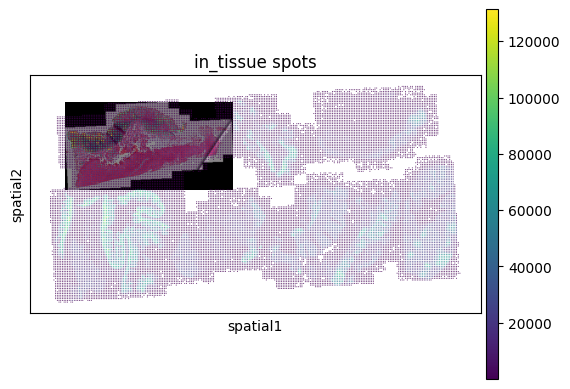

saving to pyramidal tiff... can be slow


In [7]:
# Base stem for experiment outputs
exp_stem = Path("/project/simmons_hts/shared/20_11_2024_xenium_prime_run1/"
                "20241113__143534__SIMMONS_super_secret_prime_run1/"
                "output-XETG00283__0043720__Region_1__20241113__143611") 

GI9662 = XeniumReader().read(
    img_path="/project/simmons_hts/jpark/1_project/0_xenium/"
             "RUNTRexBio/post_HnE/GI9662_Xenium5K_post_HnE.ome.tif",
    experiment_path=exp_stem / "experiment.xenium",
    alignment_file_path= '/project/simmons_hts/jpark/1_project/0_xenium/RUNTRexBio/post_HnE/GI9662_Xenium5K_post_HnE_matrix.csv',
    feature_matrix_path=exp_stem / "cell_feature_matrix.h5",
    transcripts_path=exp_stem / "transcripts.parquet",
    cells_path=exp_stem / 'cells.parquet',
    nucleus_bound_path=exp_stem / 'nucleus_boundaries.parquet',
    cell_bound_path=exp_stem / 'cell_boundaries.parquet',
    dapi_path=exp_stem / 'morphology_focus/morphology_focus_0000.ome.tif',
    use_dask=True
)

from pathlib import Path
save_dir = Path("/project/simmons_hts/kxu/hest/xenium_data/xenium_prime_run1/slide43720/ROI2")
# create directory (recursively) if it doesn't exist
save_dir.mkdir(parents=True, exist_ok=True)
GI9662.save_spatial_plot(save_dir)
# Warning saving a large image to pyramidal tiff (>1GB) can be slow on a hard drive.
GI9662.save(save_dir, pyramidal=True)

## GI7051

Loading the WSI... (can be slow for large images)
Loading transcripts...
Pooling xenium transcripts in pseudo-visium spots...
Reading cells...


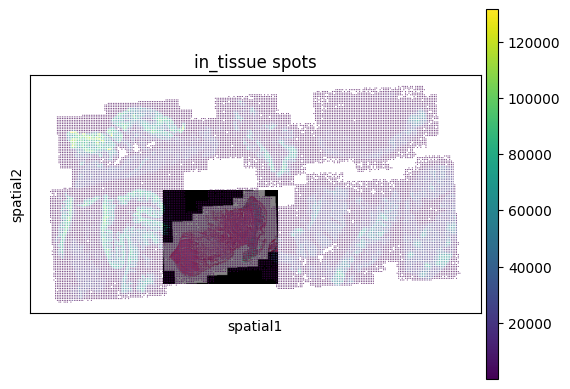

saving to pyramidal tiff... can be slow


In [8]:
# Base stem for experiment outputs
exp_stem = Path("/project/simmons_hts/shared/20_11_2024_xenium_prime_run1/"
                "20241113__143534__SIMMONS_super_secret_prime_run1/"
                "output-XETG00283__0043720__Region_1__20241113__143611") 

GI7051 = XeniumReader().read(
    img_path="/project/simmons_hts/jpark/1_project/0_xenium/"
             "RUNTRexBio/post_HnE/GI7051_Xenium5K_post_HnE.ome.tif",
    experiment_path=exp_stem / "experiment.xenium",
    alignment_file_path= '/project/simmons_hts/jpark/1_project/0_xenium/RUNTRexBio/post_HnE/GI7051_Xenium5K_post_HnE_matrix.csv',
    feature_matrix_path=exp_stem / "cell_feature_matrix.h5",
    transcripts_path=exp_stem / "transcripts.parquet",
    cells_path=exp_stem / 'cells.parquet',
    nucleus_bound_path=exp_stem / 'nucleus_boundaries.parquet',
    cell_bound_path=exp_stem / 'cell_boundaries.parquet',
    dapi_path=exp_stem / 'morphology_focus/morphology_focus_0000.ome.tif',
    use_dask=True
)

from pathlib import Path
save_dir = Path("/project/simmons_hts/kxu/hest/xenium_data/xenium_prime_run1/slide43720/ROI3")
# create directory (recursively) if it doesn't exist
save_dir.mkdir(parents=True, exist_ok=True)
GI7051.save_spatial_plot(save_dir)
# Warning saving a large image to pyramidal tiff (>1GB) can be slow on a hard drive.
GI7051.save(save_dir, pyramidal=True)

## CAM005

Loading the WSI... (can be slow for large images)
Loading transcripts...
Pooling xenium transcripts in pseudo-visium spots...
Reading cells...


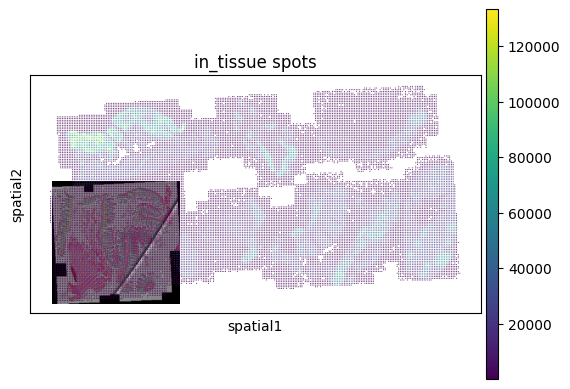

saving to pyramidal tiff... can be slow


In [12]:
from pathlib import Path

# Base stem for experiment outputs
exp_stem = Path("/project/simmons_hts/shared/20_11_2024_xenium_prime_run1/"
                "20241113__143534__SIMMONS_super_secret_prime_run1/"
                "output-XETG00283__0043720__Region_1__20241113__143611") 

CAM005 = XeniumReader().read(
    img_path="/project/simmons_hts/jpark/1_project/0_xenium/"
             "RUNTRexBio/post_HnE/CAM005_Xenium5K_post_HnE.ome.tif",
    experiment_path=exp_stem / "experiment.xenium",
    alignment_file_path= '/project/simmons_hts/jpark/1_project/0_xenium/RUNTRexBio/post_HnE/CAM005_Xenium5K_post_HnE_matrix.csv',
    feature_matrix_path=exp_stem / "cell_feature_matrix.h5",
    transcripts_path=exp_stem / "transcripts.parquet",
    cells_path=exp_stem / 'cells.parquet',
    nucleus_bound_path=exp_stem / 'nucleus_boundaries.parquet',
    cell_bound_path=exp_stem / 'cell_boundaries.parquet',
    dapi_path=exp_stem / 'morphology_focus/morphology_focus_0000.ome.tif',
    use_dask=True
)

from pathlib import Path
save_dir = Path("/project/simmons_hts/kxu/hest/xenium_data/xenium_prime_run1/slide43720/ROI1")
# create directory (recursively) if it doesn't exist
save_dir.mkdir(parents=True, exist_ok=True)
CAM005.save_spatial_plot(save_dir)
# Warning saving a large image to pyramidal tiff (>1GB) can be slow on a hard drive.
CAM005.save(save_dir, pyramidal=True)